In [1]:
import kagglehub
dataset_path = kagglehub.dataset_download('harshvardhan21/sign-language-detection-using-images')

import os
import warnings

print("Contents of the dataset directory:")
print(os.listdir(dataset_path))
print("Current Working Directory:", os.getcwd())
warnings.filterwarnings('ignore') 

Contents of the dataset directory:
['data']
Current Working Directory: C:\Users\aswat\ML


In [2]:
data = os.path.join(dataset_path, 'data')
print("Dataset directory path:", data)

if os.path.exists(data):
    print("Contents:", os.listdir(data))
else:
    print("Dataset not found at:", data)

Dataset directory path: C:\Users\aswat\.cache\kagglehub\datasets\harshvardhan21\sign-language-detection-using-images\versions\1\data
Contents: ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder

In [23]:
def preprocess_image(image_path, img_size=(64, 64)):
    image = load_img(image_path, target_size=img_size)
    image = img_to_array(image)
    image = image/255.0
    return image

In [5]:
images = []
labels = []

In [6]:
for label_dir in os.listdir(data):
    if os.path.isdir(os.path.join(data, label_dir)):
        for fle in os.listdir(os.path.join(data, label_dir)):
            image_path = os.path.join(data, label_dir, fle)
            images.append(preprocess_image(image_path))
            labels.append(label_dir)
print('completed')

completed


In [7]:
images = np.array(images)
labels = np.array(labels)

In [8]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
num_classes = len(label_encoder.classes_)
labels_categorical = to_categorical(labels_encoded, num_classes)

In [9]:
np.save('classes.npy', label_encoder.classes_)

In [10]:
def model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [11]:
input_shape = (64, 64, 3)
model = model(input_shape, num_classes)
model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 35)                  │           4,515 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,457,187 (9.37 MB)

 Trainable params: 2,457,187 (9.37 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(images, labels_categorical, epochs = 5, validation_split = 0.2)

Epoch 1/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 129s 117ms/step - accuracy: 0.9445 - loss: 0.2078 - val_accuracy: 0.0000e+00 - val_loss: 28.8748
Epoch 2/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 113s 108ms/step - accuracy: 1.0000 - loss: 2.0405e-06 - val_accuracy: 0.0000e+00 - val_loss: 30.6387
Epoch 3/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9925s 9s/step - accuracy: 1.0000 - loss: 7.4789e-07 - val_accuracy: 0.0000e+00 - val_loss: 31.9789
Epoch 4/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 123s 117ms/step - accuracy: 1.0000 - loss: 3.0675e-07 - val_accuracy: 0.0000e+00 - val_loss: 33.1910
Epoch 5/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 119s 113ms/step - accuracy: 1.0000 - loss: 1.8156e-07 - val_accuracy: 0.0000e+00 - val_loss: 34.2993


In [20]:
def predict_sign(image_path):
    image = preprocess_image(image_path)
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    prediction_class = np.argmax(prediction)
    return label_encoder.inverse_transform([prediction_class])[0]

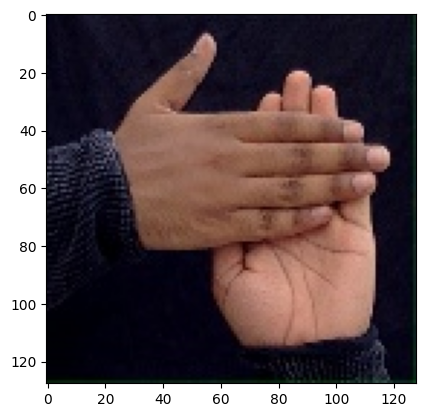

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
H


In [27]:
image_path = os.path.join(dataset_path,'data','H','0.jpg')

plt.imshow(load_img(image_path))
plt.show()

prediction = predict_sign(image_path)
print(prediction)

In [ ]:
model.save('model.h5') 
print("Model saved to: model.h5")